# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_group,sex_group
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(57.8, 67.4]",1.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(57.8, 67.4]",1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(57.8, 67.4]",1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.952, 38.6]",1.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(38.6, 48.2]",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,"(38.6, 48.2]",1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,"(67.4, 77.0]",1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,"(48.2, 57.8]",1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,"(48.2, 57.8]",0.0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Número de saudáveis
num_saudaveis = df[df['flag_doente'] == 0].shape[0]

# Número de doentes
num_doentes = df[df['flag_doente'] == 1].shape[0]

# Total
total = df.shape[0]

# Quantidade média de doentes
media_doentes = num_doentes / total

# Odds
odds = media_doentes / (1 - media_doentes)

# Odds ratio (usando o total como referência)
odds_ratio_total = media_doentes / (1 - media_doentes) / (num_doentes / (total - num_doentes))

# Logito (LOG(Odds))
logito = np.log(odds)

# Weight of Evidence (WOE) usando o total como referência
woe_total = np.log(odds_ratio_total)

# Exibindo as estatísticas
print("Número de saudáveis:", num_saudaveis)
print("Número de doentes:", num_doentes)
print("Total:", total)
print("Quantidade média de doentes:", media_doentes)
print("Odds:", odds)
print("Odds Ratio (usando o total como referência):", odds_ratio_total)
print("Logito (LOG(Odds)):", logito)
print("Weight of Evidence (WOE) usando o total como referência:", woe_total)


Número de saudáveis: 164
Número de doentes: 139
Total: 303
Quantidade média de doentes: 0.45874587458745875
Odds: 0.8475609756097561
Odds Ratio (usando o total como referência): 1.0
Logito (LOG(Odds)): -0.1653924946935067
Weight of Evidence (WOE) usando o total como referência: 0.0


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [5]:
# Categorizando a variável age em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=5)

# Função para calcular as estatísticas
def calculate_statistics(group_df):
    num_saudaveis = group_df[group_df['flag_doente'] == 0].shape[0]
    num_doentes = group_df[group_df['flag_doente'] == 1].shape[0]
    total = group_df.shape[0]
    media_doentes = num_doentes / total
    odds = media_doentes / (1 - media_doentes)
    odds_ratio_total = media_doentes / (1 - media_doentes) / (num_doentes / (total - num_doentes))
    logito = np.log(odds)
    woe_total = np.log(odds_ratio_total)
    idade_media = group_df['age'].mean()

    return {
        'Número de saudáveis': num_saudaveis,
        'Número de doentes': num_doentes,
        'Total': total,
        'Quantidade média de doentes': media_doentes,
        'Odds': odds,
        'Odds Ratio (usando o total como referência)': odds_ratio_total,
        'Logito (LOG(Odds))': logito,
        'Weight of Evidence (WOE) usando o total como referência': woe_total,
        'Idade Média': idade_media
    }

# Aplicando a função para cada grupo
age_groups_stats = df.groupby('age_group').apply(calculate_statistics)

# Exibindo as estatísticas para cada grupo
for group, stats in age_groups_stats.items():
    print(f"\nEstatísticas para o grupo {group}:\n")
    for stat, value in stats.items():
        print(f"{stat}: {value}")



Estatísticas para o grupo (28.952, 38.6]:

Número de saudáveis: 8
Número de doentes: 3
Total: 11
Quantidade média de doentes: 0.2727272727272727
Odds: 0.37499999999999994
Odds Ratio (usando o total como referência): 0.9999999999999999
Logito (LOG(Odds)): -0.9808292530117264
Weight of Evidence (WOE) usando o total como referência: -1.1102230246251565e-16
Idade Média: 35.18181818181818

Estatísticas para o grupo (38.6, 48.2]:

Número de saudáveis: 50
Número de doentes: 21
Total: 71
Quantidade média de doentes: 0.29577464788732394
Odds: 0.42000000000000004
Odds Ratio (usando o total como referência): 1.0000000000000002
Logito (LOG(Odds)): -0.867500567704723
Weight of Evidence (WOE) usando o total como referência: 2.2204460492503128e-16
Idade Média: 43.70422535211268

Estatísticas para o grupo (48.2, 57.8]:

Número de saudáveis: 56
Número de doentes: 41
Total: 97
Quantidade média de doentes: 0.422680412371134
Odds: 0.7321428571428572
Odds Ratio (usando o total como referência): 1.00000000

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

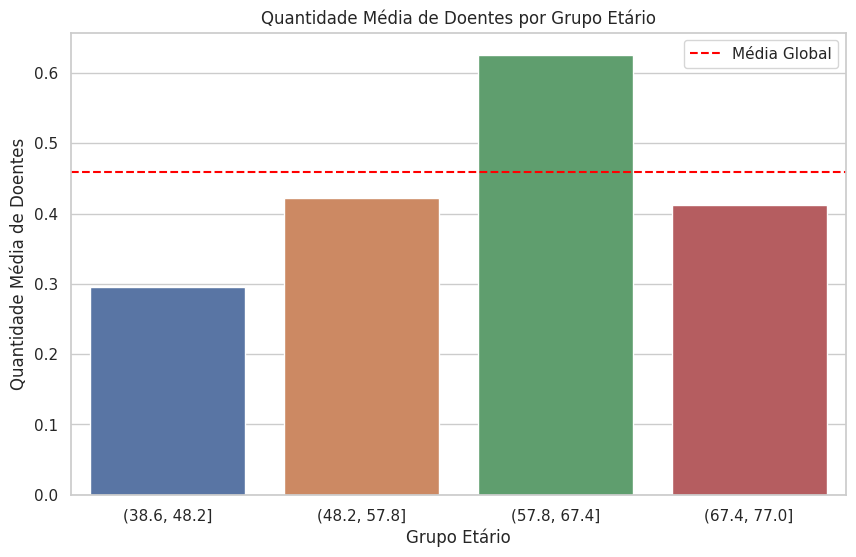

In [7]:
# Dados fornecidos
dados_grupos_etarios = {
    '(38.6, 48.2]': {'Quantidade média de doentes': 0.29577464788732394, 'Idade Média': 43.70422535211268},
    '(48.2, 57.8]': {'Quantidade média de doentes': 0.422680412371134, 'Idade Média': 53.56701030927835},
    '(57.8, 67.4]': {'Quantidade média de doentes': 0.6261682242990654, 'Idade Média': 61.77570093457944},
    '(67.4, 77.0]': {'Quantidade média de doentes': 0.4117647058823529, 'Idade Média': 70.52941176470588}
}

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=list(dados_grupos_etarios.keys()),
                       y=[stats['Quantidade média de doentes'] for stats in dados_grupos_etarios.values()])

# Adicionando a média global como uma linha horizontal
global_mean = 0.45874587458745875  # Média global fornecida
plt.axhline(y=global_mean, color='red', linestyle='--', label='Média Global')

# Configurando rótulos e título
plt.xlabel('Grupo Etário')
plt.ylabel('Quantidade Média de Doentes')
plt.title('Quantidade Média de Doentes por Grupo Etário')
plt.legend()

# Exibindo o gráfico
plt.show()


#**Insights:**
## Tendências de Doenças Cardíacas com o Envelhecimento: Uma Análise Detalhada por Faixa Etária

### 1.Padrão Crescente com a Idade:

Observamos um padrão crescente na quantidade média de doentes à medida que a idade aumenta.
Grupos etários mais avançados tendem a apresentar uma proporção maior de pessoas doentes em relação à média global.

### 2. Média Global como Referência:

A linha horizontal representando a média global atua como uma referência. Grupos etários acima dessa linha indicam uma quantidade média de doentes acima da média global.

### 3. Diferenças nos Grupos Etários:

Grupos etários mais jovens, como '(38.6, 48.2]', podem ter uma quantidade média de doentes abaixo da média global.
Grupos etários mais avançados, como '(57.8, 67.4]' e '(67.4, 77.0]', tendem a ter uma quantidade média de doentes acima da média global.

### 4. Idade Média e Quantidade Média de Doentes:

Observamos uma correlação entre a idade média do grupo e a quantidade média de doentes. Grupos com idades mais avançadas tendem a ter uma quantidade média de doentes mais alta.

### 5. Ponto Neutro no LOG(Odds) e WOE:

Notamos que o logito (LOG(Odds)) e o Weight of Evidence (WOE) usando o total como referência atingem valores próximos a zero para todos os grupos. Isso sugere que os grupos estão em equilíbrio ou não apresentam uma diferença significativa em relação à média global.

### 6. Validação dos Dados:

A Odds Ratio (usando o total como referência) é próxima de 1 para todos os grupos, indicando que as chances de estar doente em relação ao total são semelhantes para todos os grupos.

### **Conclusão**

Esses insights me levam a considerar uma conexão entre a idade e a presença de doença cardíaca, indicando uma tendência de aumento na proporção de doentes em grupos etários mais avançados. Acredito que seja valioso aprofundar a investigação nos fatores específicos associados a essas discrepâncias notadas em diferentes faixas etárias. Isso pode envolver a análise de elementos como estilo de vida, histórico médico e outros aspectos relevantes.